In [1]:
!pip install emoji==1.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=1d42f763f2f4e7ef57a8c0cbb16827284f252586595ae22621181cc6cd76ba31
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import re
import emoji
from scipy.stats import ttest_ind
from datetime import datetime, date
from scipy import stats


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# mypath = 'drive/MyDrive/VK/'

In [5]:
# from os import listdir
# from os.path import isfile, join
# filenames = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [6]:
# len(filenames)

In [7]:
# df = pd.DataFrame()

In [8]:
# for filename in filenames:
#     print(filename)
#     f = pd.read_csv(mypath + filename)
#     df = pd.concat([f, df], ignore_index=True)

In [9]:
# df.shape

In [10]:
# df.to_csv('drive/MyDrive/VK/VK_without_preprocessing', index = False)

In [47]:
df = pd.read_csv('drive/MyDrive/VK/VK_without_preprocessing')

<ipython-input-47-81610f0c75b0>:1: DtypeWarning: Columns (2,16,94,118,119,120,122,123,125,127,130,132,133,134,135,139,140,141,142,144,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('drive/MyDrive/VK/VK_without_preprocessing')


In [48]:
df.shape

(777964, 148)

In [49]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [50]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_info_columns', 500)

При скачивании использовался random.randrange() поэтому в данных получились дубликаты, в данные попали также удаленные и забаненные пользователи


In [51]:
df.drop_duplicates(subset=['id'], inplace = True)
df = df[(df.deactivated != 'banned') & (df.deactivated != 'deleted')]

In [52]:
df.shape

(535392, 147)

In [53]:
df.head()

,id,nickname,domain,bdate,photo_max,photo_max_orig,photo_id,has_photo,has_mobile,is_friend,can_see_audio,wall_default,can_write_private_message,can_send_friend_request,mobile_phone,home_phone,site,status,followers_count,is_favorite,is_hidden_from_feed,common_count,sex,screen_name,online,verified,friend_status,first_name,last_name,can_access_closed,is_closed,last_seen_platform,last_seen_time,crop_photo_photo_album_id,crop_photo_photo_date,crop_photo_photo_id,crop_photo_photo_owner_id,crop_photo_photo_post_id,crop_photo_photo_sizes,crop_photo_photo_square_crop,crop_photo_photo_text,crop_photo_photo_has_tags,crop_photo_crop_x,crop_photo_crop_y,crop_photo_crop_x2,crop_photo_crop_y2,crop_photo_rect_x,crop_photo_rect_y,crop_photo_rect_x2,crop_photo_rect_y2,counters_albums,counters_audios,counters_followers,counters_friends,counters_online_friends,counters_pages,counters_photos,counters_subscriptions,counters_videos,counters_video_playlists,counters_mutual_friends,counters_clips_followers,interests,tv,quotes,games,movies,music,career,military,university,university_name,faculty,faculty_name,graduation,home_town,relation,personal,universities,schools,relatives,city_id,city_title,country_id,country_title,counters_gifts,counters_groups,counters_user_photos,deactivated,maiden_name,personal_langs,personal_langs_full,counters_posts,twitter,occupation_id,occupation_name,occupation_type,occupation_country_id,occupation_city_id,personal_alcohol,personal_inspired_by,personal_life_main,personal_people_main,personal_political,personal_religion,personal_religion_id,personal_smoking,occupation_graduate_year,crop_photo_photo_lat,crop_photo_photo_long,online_mobile,online_app,counters_clips,counters_clips_views,counters_clips_likes,education_form,counters_articles,skype,facebook,facebook_name,relation_partner_id,relation_partner_first_name,relation_partner_last_name,education_status,instagram,counters_wishes,status_audio_artist,status_audio_id,status_audio_owner_id,status_audio_title,status_audio_duration,status_audio_is_explicit,status_audio_is_focus_track,status_audio_track_code,status_audio_url,status_audio_date,status_audio_lyrics_id,status_audio_no_search,status_audio_main_artists,status_audio_short_videos_allowed,status_audio_stories_allowed,status_audio_stories_cover_allowed,status_audio_genre_id,status_audio_featured_artists,crop_photo_photo_place,status_audio_subtitle,livejournal
0,440997757,NaN,id440997757,9.10.1982,https://sun9-22.userapi.com/s/v1/if1/9cHKu02YD...,https://sun9-22.userapi.com/s/v1/if1/P_ALC75ZP...,440997757_456239019,1,1.0,0.0,0.0,owner,0,1.0,NaN,NaN,NaN,NaN,26.0,0,0.0,0.0,2,id440997757,0.0,0.0,0,Виталий,Родионов,True,False,7.0,1.502288e+09,-6.0,1.501968e+09,456239019.0,440997757.0,6.0,"[{'height': 130, 'type': 'm', 'width': 130, 'u...","76,9,524",NaN,False,1.57,1.29,95.00,94.71,9.94,0.00,90.06,80.12,0.0,0.0,2.0,24.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,446972357,NaN,id446972357,27.2.2003,https://sun9-79.userapi.com/s/v1/if1/zejoFwa7s...,https://sun9-79.userapi.com/s/v1/if1/wsazNoyi5...,446972357_456239017,1,1.0,0.0,1.0,all,1,1.0,NaN,NaN,NaN,NaN,5.0,0,0.0,0.0,2,id446972357,0.0,0.0,0,Ваня,Тонков,True,False,7.0,1.528655e+09,-6.0,1.505286e+09,456239017.0,446972357.0,1.0,"[{'height': 97, 'type': 'm', 'width': 130, 'ur...","288,129,701",NaN,False,15.70,4.38,84.14,95.63,9.93,9.93,89.95,89.95,0.0,0.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],0.0,NaN,0.0,NaN,0.0,NaN,0.0,[],[],"[{'city': 56, 'class': 'а', 'class_id': 1, 'co...",[],56.0,Ижевск,1.0,Россия,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Нас интересуют пользователи последняя активность которых была хотя бы 4 года назад

In [54]:
df = df[df.last_seen_time > 1558615200]

In [55]:
df.shape

(252231, 147)

Нас интересуют пользователи с заполненной датой рождения


In [56]:
df_with_bday = df[df['bdate'].str.match('\d{1,2}\.\d{1,2}\.\d{4}') == True]

In [57]:
df_with_bday.shape

(190672, 147)

У вк была интересная фича, раньше можно было указать в др несуществующую дату февраля:)

In [58]:
def age(born):
    try:
        born = datetime.strptime(born, "%d.%m.%Y").date()
    except(ValueError):
        print(born)
        born = '28' + '.' + '2' + '.' + born[5:9]
        born = datetime.strptime(born, "%d.%m.%Y").date()
    today = date.today()
    return today.year - born.year - int((today.month,
                                      today.day) < (born.month,
                                                    born.day))

df_with_bday['age'] = df_with_bday['bdate'].apply(age)

31.2.1990
29.2.1951
31.2.1983
31.2.1989


<ipython-input-58-ae3d60c38ea8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_bday['age'] = df_with_bday['bdate'].apply(age)


In [59]:
def chart(x1,x2):
  fig, ax = plt.subplots()
  ax.bar(x1.columns, (~x1.isna()).sum() / x1.shape[0], color = 'green', alpha = 0.9, label = 'Все данные')
  ax.bar(x2.columns[:-1], (~x2.iloc[:,:-1].isna()).sum()/x2.shape[0], color = 'purple', alpha = 0.7, label = 'Данные с датой рождения')

  ax.set_facecolor('white')
  fig.set_facecolor('floralwhite')
  plt.xticks(rotation=90)
  fig.set_figwidth(25)    #  ширина Figure
  fig.set_figheight(10)
  plt.legend()
  plt.xlabel('Признаки')
  plt.ylabel('Нормализованная заполненность профиля')
  plt.title('Заполненность признаков')
  plt.show()

In [24]:
col = df_with_bday.columns[df_with_bday.notna().sum() > 20].to_list()
df_not_nan = [len(df[df[i].isnull() == False]) / df.shape[0] for i in col[1:-1]]
df_bday_not_nan = [len(df_with_bday[df_with_bday[i].isnull() == False]) / df_with_bday.shape[0] for i in col[1:-1]]

Мы используем тест хи-квадрат на независимость , когда хотим формально проверить, существует ли статистически значимая связь между двумя категориальными переменными. В нашем случае, хотим проверить есть ли связь между двумя выборками (с возрастом и без).

Гипотезы теста следующие:

Нулевая гипотеза (H0): между двумя переменными нет существенной связи. Выборка части пользователей похожа на выборку всех пользователей.

Альтернативная гипотеза: (H1): существует значительная связь между двумя переменными.  Выборка части пользователей не похожа на выборку всех пользователей.

In [25]:
def chisq(df_not_nan, df_bday_not_nan):
  chi2, p_value, dof, ev = stats.chi2_contingency(([df_not_nan, df_bday_not_nan]))
  print(f'''
  Хи квадрат {chi2}
  p - value {p_value}
  Степеней свобод {dof}
  ''')

def t_test(df_not_nan,df_bday_not_nan):
  stat, p_value = ttest_ind(df_not_nan, df_bday_not_nan)
  print(f"t-test: statistic={stat:.4f}, p-value={p_value:.4f}")

In [26]:

df_not_nan = [len(df[df[i].isnull() == False]) for i in col[1:-1]]
df_bday_not_nan = [len(df_with_bday[df_with_bday[i].isnull() == False]) for i in col[1:-1]]

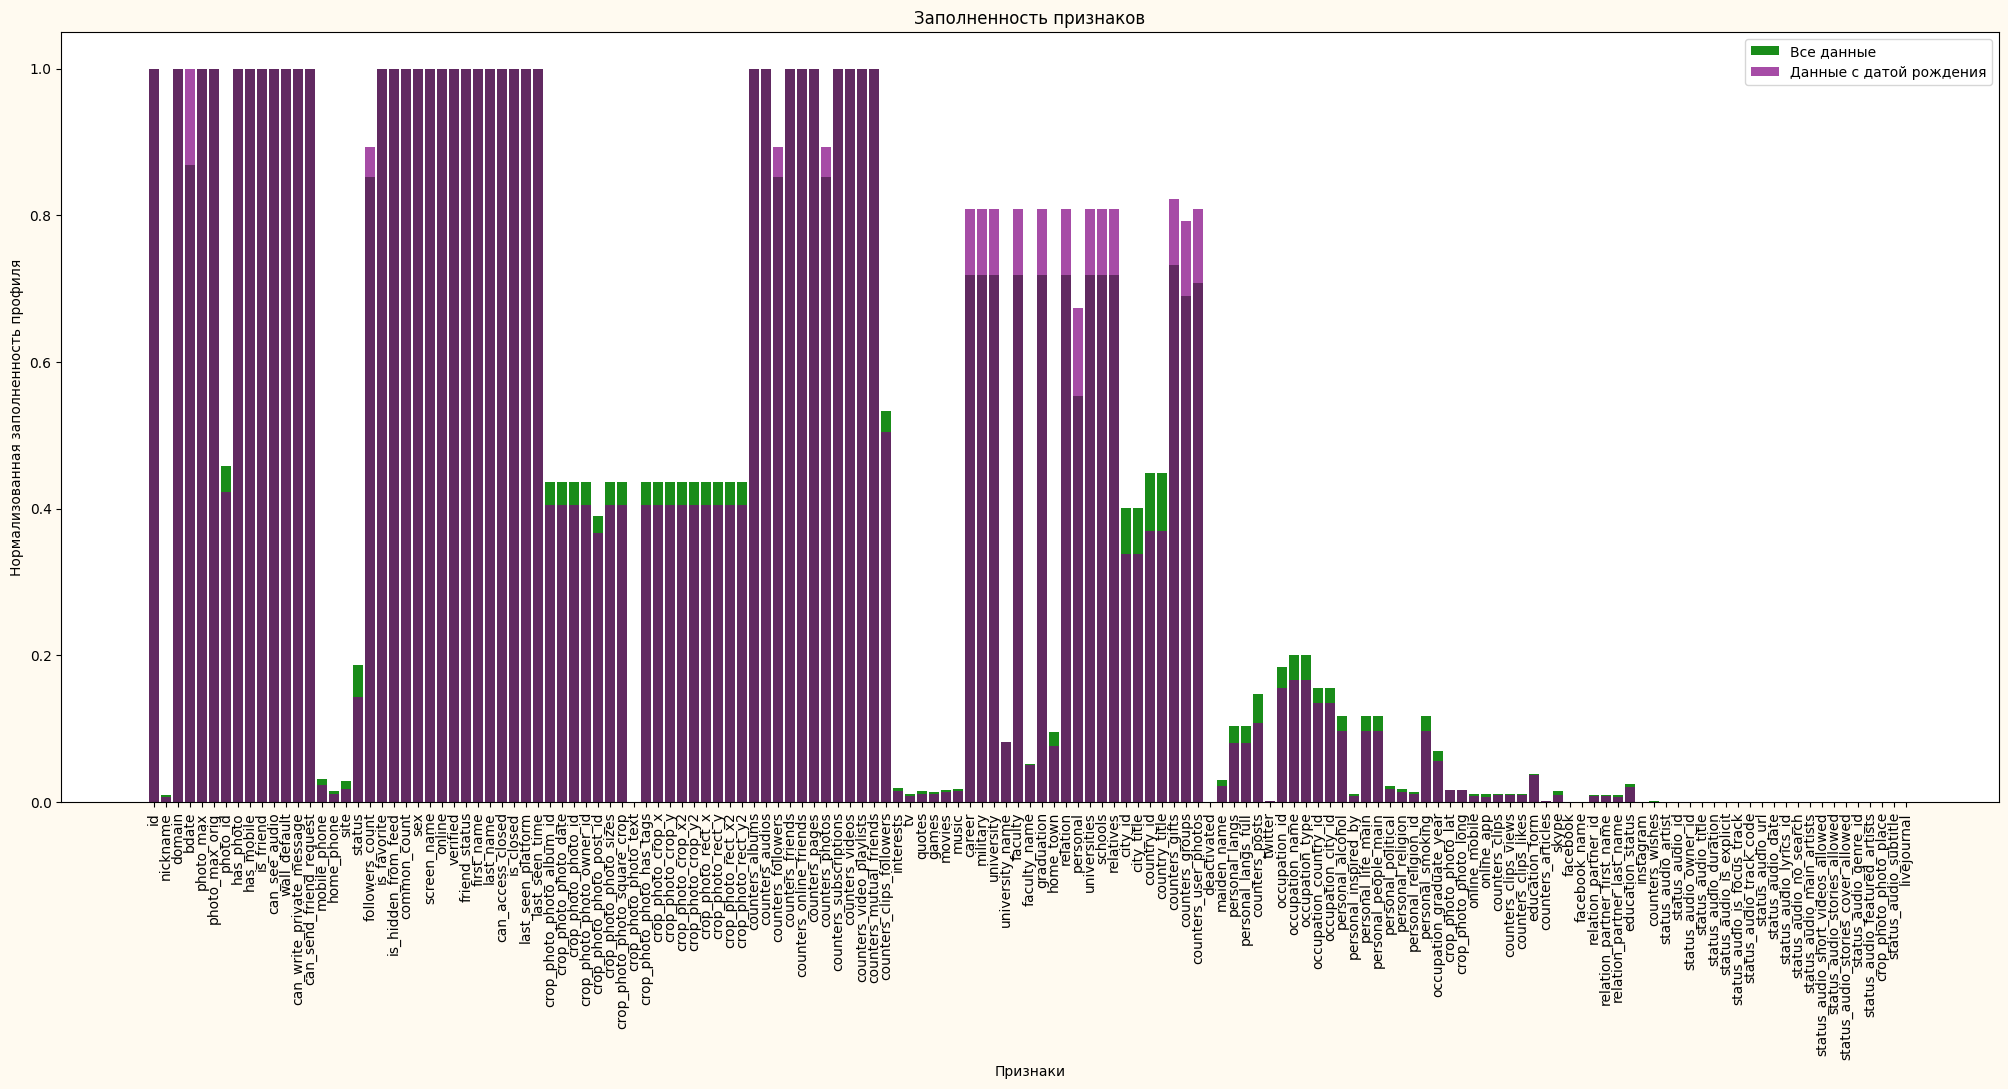


  Хи квадрат 41969.65811299236
  p - value 0.0
  Степеней свобод 132
  
t-test: statistic=2.3593, p-value=0.0190


In [27]:
chart(df, df_with_bday)
chisq(df_not_nan, df_bday_not_nan)
t_test(df_not_nan, df_bday_not_nan)


p значение больше уровня значимости, выборка части пользователей похожа на выборку всех пользователей

Наше p-value > 5%. У нас недостаточно оснований отклонить нулевую гипотезу.

Уберем ненужные признаки


Сначала рассмотрим признаки, которых недостаточно заполнено и те, которые не несут смысловой нагрузки(размер фотографий). Удалим id, чтобы алгоритм не переучился на этот показатель


In [28]:
def f_domain(row):
  try:
    val = bool(re.search(r'id\d{7,9}', row))
    return val
  except(Exception):
    return False


In [29]:
for i in ['domain', 'nickname']:
   df['is_'+ i] = df[i].apply(f_domain)

Выберем переменные, в которых нас интересует лишь наличие или отсутсвие признака

In [30]:
for i in ['personal_langs', 'city_id', 'country_id', 'home_town', 'skype', 'instagram', 'twitter', 'site', 'home_phone', 'interests','tv',	'quotes',	'games',	'movies',\
          'music', 'personal_religion', 'screen_name','education_form', 'personal_life_main',	'personal_people_main',	'personal_political', \
          'education_status', 'facebook','facebook_name','relation_partner_id', 'university','military', 'maiden_name', 'personal_inspired_by']:
  df['is_'+ i] = df[i].notna()
  df.drop(columns = [i], inplace = True)

In [31]:
def is_null(row):
  return not(row == '[]')

In [32]:
for i in ['career', 'schools']:
  df['is_'+ i] = (df[i].notna()) & (df[i].apply(is_null))

In [33]:
def year(row, ft):
  try:
    row = (ast.literal_eval(row))[0][ft]
  except(Exception):
    row = 0
  return row

In [34]:
def smile(row):
  try:
    val = len(emoji.emoji_list(row.status))
  except(Exception):
    val = 0
  return(val)

In [35]:
df['has_smile'] = df.apply(smile, axis = 1)
df['year_career'] = df[df.is_career == True].career.apply(year, ft = 'from')
df['year_schools_to'] = df[df.is_schools == True].schools.apply(year, ft = 'year_to')
df['year_schools_from'] = df[df.is_schools == True].schools.apply(year, ft = 'year_from')

In [36]:
def parse_relatives(row, relatives):
  try:
    if ("'" + relatives + "'") in row:
      return row.count("'" + relatives + "'")
    else:
      return 0
  except(Exception):
    return 0

In [37]:
for i in ['child', 'sibling', 'parent', 'grandparent', 'grandchild']:
  df['has_' + i] = df.relatives.apply(parse_relatives, relatives = i)

In [38]:
df.drop(columns = ['id', 'photo_max_orig', 'is_friend', 'mobile_phone', 'is_favorite', 'is_hidden_from_feed', 'common_count', 'online',\
                   'verified', 'friend_status', 'last_seen_platform', 'can_access_closed', 'crop_photo_photo_album_id', 'crop_photo_photo_date',\
                   'crop_photo_photo_id', 'crop_photo_photo_owner_id', 'crop_photo_photo_post_id', 'crop_photo_photo_sizes', 'crop_photo_photo_square_crop',\
                   'crop_photo_photo_text', 'crop_photo_photo_has_tags', 'crop_photo_crop_x', 'crop_photo_crop_y', 'crop_photo_crop_x2', \
                   'crop_photo_crop_y2', 'crop_photo_rect_x', 'crop_photo_rect_y', 'crop_photo_rect_x2', 'crop_photo_rect_y2', 'deactivated', \
                   'counters_wishes', 'status_audio_artist', 'status_audio_id', 'status_audio_owner_id', 'status_audio_title', 'status_audio_duration', \
                   'status_audio_is_explicit', 'status_audio_is_focus_track', 'status_audio_track_code', 'status_audio_url', 'status_audio_date', \
                   'status_audio_lyrics_id', 'status_audio_no_search', 'status_audio_main_artists', 'status_audio_short_videos_allowed', \
                   'status_audio_stories_allowed', 'status_audio_stories_cover_allowed', 'status_audio_genre_id', 'status_audio_featured_artists', \
                   'crop_photo_photo_place', 'status_audio_subtitle', 'livejournal',"city_title",	"country_title", "crop_photo_photo_lat",	"crop_photo_photo_long",\
                   "online_mobile",	"online_app",	"counters_clips",	"counters_clips_views",	"counters_clips_likes",	"counters_articles",
                   'counters_mutual_friends','occupation_id',	'occupation_name', 'occupation_country_id',	'occupation_city_id','last_seen_time', \
                   'counters_video_playlists', 'university_name',	'faculty',	'faculty_name', \
                   "relation_partner_first_name",	"relation_partner_last_name", 'personal_langs_full', 'personal', 'universities',	'schools', 'relatives'], inplace = True)

In [39]:
df.drop(columns = ['nickname', 'domain', 'photo_max', 'photo_id','status', 'first_name', 'last_name', 'career'], inplace = True)

In [40]:
df.head()

,bdate,has_photo,has_mobile,can_see_audio,wall_default,can_write_private_message,can_send_friend_request,followers_count,sex,is_closed,counters_albums,counters_audios,counters_followers,counters_friends,counters_online_friends,counters_pages,counters_photos,counters_subscriptions,counters_videos,counters_clips_followers,graduation,relation,counters_gifts,counters_groups,counters_user_photos,counters_posts,occupation_type,personal_alcohol,personal_religion_id,personal_smoking,occupation_graduate_year,is_domain,is_nickname,is_personal_langs,is_city_id,is_country_id,is_home_town,is_skype,is_instagram,is_twitter,is_site,is_home_phone,is_interests,is_tv,is_quotes,is_games,is_movies,is_music,is_personal_religion,is_screen_name,is_education_form,is_personal_life_main,is_personal_people_main,is_personal_political,is_education_status,is_facebook,is_facebook_name,is_relation_partner_id,is_university,is_military,is_maiden_name,is_personal_inspired_by,is_career,is_schools,has_smile,year_career,year_schools_to,year_schools_from,has_child,has_sibling,has_parent,has_grandparent,has_grandchild
7,NaN,1,1.0,1.0,all,1,1.0,146.0,1,False,0.0,23.0,20.0,126.0,1.0,54.0,2.0,5.0,0.0,146.0,0.0,2.0,0.0,118.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,True,0,NaN,0.0,0.0,0,0,0,0,0
12,NaN,1,0.0,1.0,all,1,1.0,15.0,1,False,0.0,8.0,3.0,12.0,0.0,0.0,2.0,0.0,1.0,15.0,0.0,0.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,0,NaN,NaN,NaN,0,0,0,0,0
15,NaN,1,1.0,0.0,all,1,1.0,NaN,1,True,0.0,0.0,NaN,41.0,2.0,238.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,NaN,NaN,NaN,0,0,0,0,0
23,9.3.1974,0,1.0,0.0,all,1,1.0,74.0,2,False,0.0,0.0,72.0,2.0,0.0,61.0,0.0,4.0,41.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,NaN,NaN,NaN,0,0,0,0,0
25,9.6.1960,1,1.0,1.0,all,1,1.0,18.0,1,False,0.0,0.0,1.0,17.0,1.0,9.0,3.0,0.0,0.0,18.0,0.0,0.0,1.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,0,NaN,NaN,NaN,0,0,0,0,0


In [41]:
df_with_bday2 = df[df['bdate'].str.match('\d{1,2}\.\d{1,2}\.\d{4}') == True]

In [42]:
df_with_bday2['age'] = df_with_bday2['bdate'].apply(age)

31.2.1990
29.2.1951
31.2.1983
31.2.1989


<ipython-input-42-ce41b8546040>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_bday2['age'] = df_with_bday2['bdate'].apply(age)


In [43]:
col = df_with_bday2.columns.to_list()

df_not_nan = [len(df[df[i].isnull() == False]) / df.shape[0] for i in col[1:-1]]
df_bday_not_nan = [len(df_with_bday2[df_with_bday2[i].isnull() == False]) / df_with_bday2.shape[0] for i in col[1:-1]]

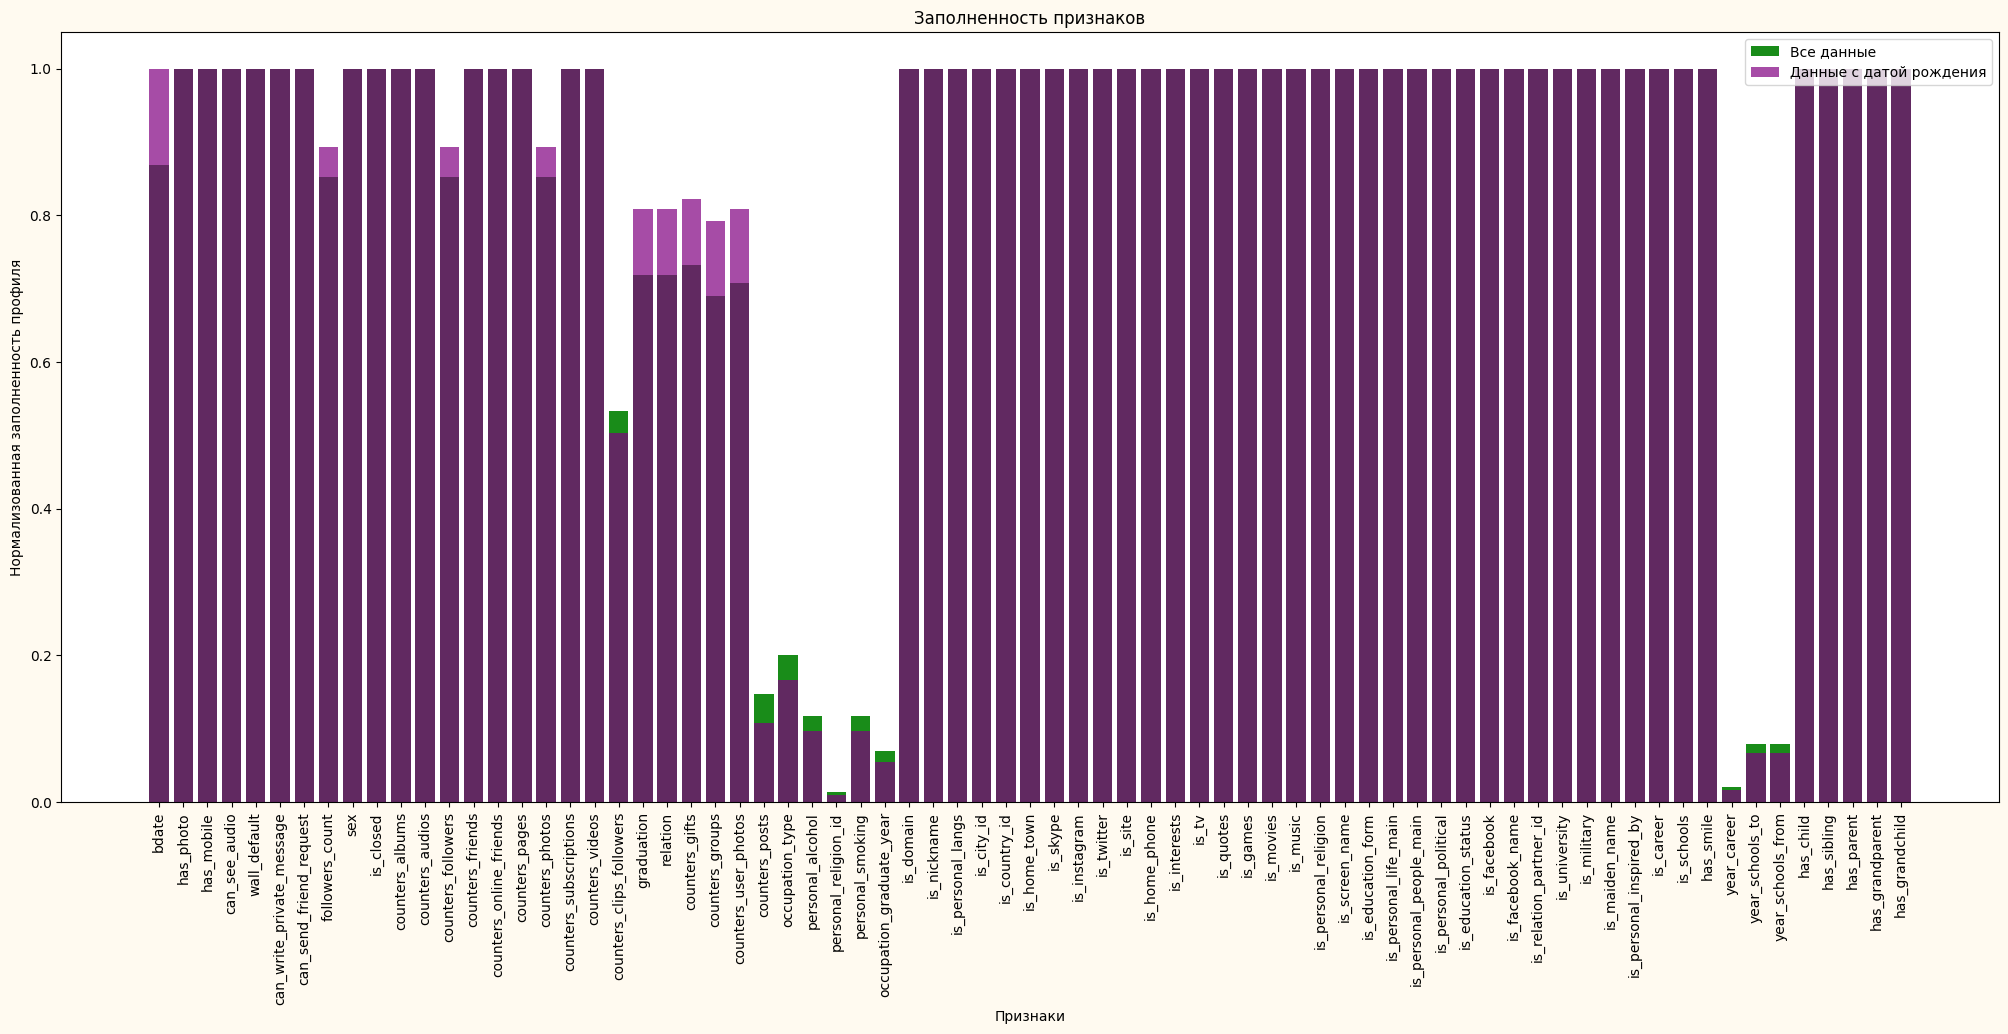


  Хи квадрат 0.05004090737348414
  p - value 1.0
  Степеней свобод 71
  
t-test: statistic=-0.1089, p-value=0.9134


In [44]:
chart(df, df_with_bday2)
chisq(df_not_nan, df_bday_not_nan)
t_test(df_not_nan, df_bday_not_nan)

In [45]:
# df.to_csv('drive/MyDrive/VK/VK_without_columns', index = False)

In [47]:
# df_with_bday.to_csv('drive/MyDrive/VK/VK_without_preparing_with_bday', index = False)

In [48]:
df_with_bday2.to_csv('drive/MyDrive/VK/VK_without_columns_with_bday_fixed', index = False)